# 自己回帰

### データインポート

In [1]:
data(BJsales)

### プロット

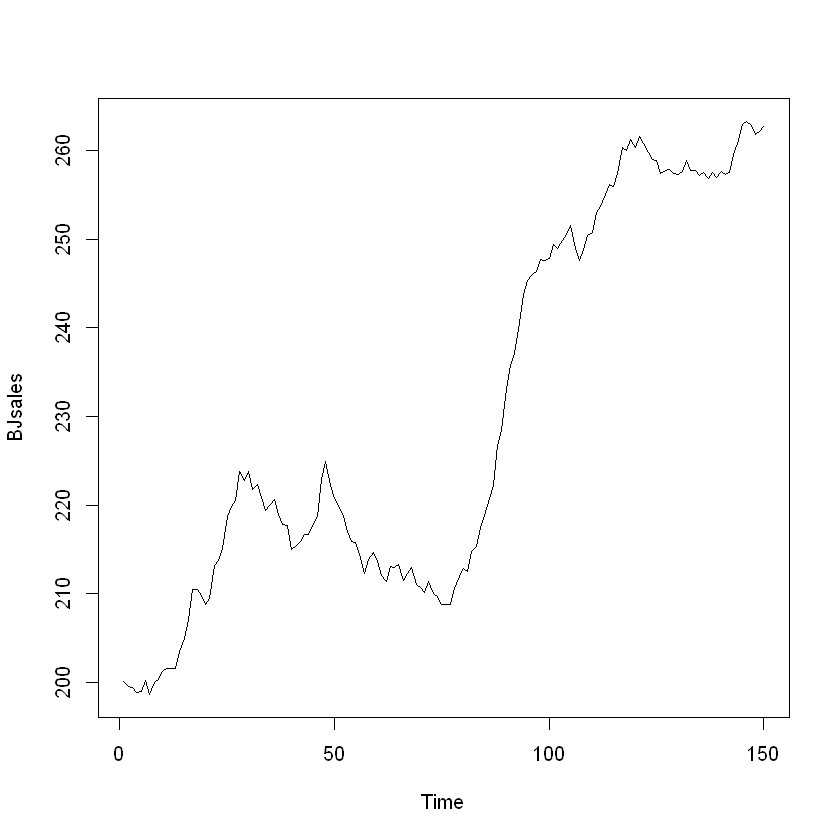

In [2]:
plot(BJsales)

### 自己相関（コレログラム）

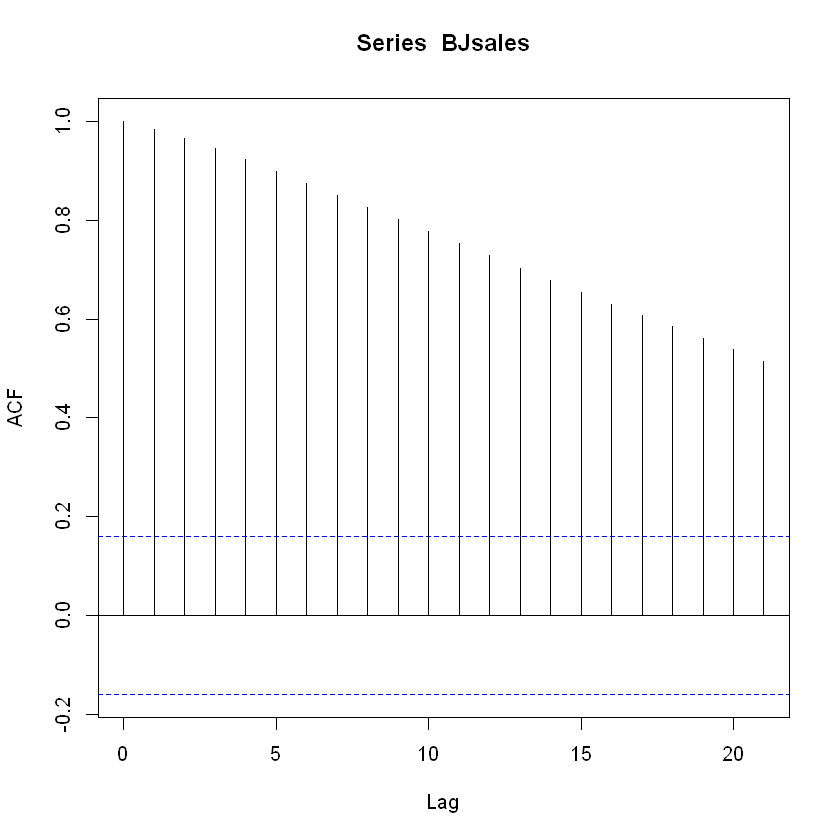

In [3]:
acf(BJsales)

In [4]:
BJsales

A Time Series:
  [1] 200.1 199.5 199.4 198.9 199.0 200.2 198.6 200.0 200.3 201.2 201.6 201.5
 [13] 201.5 203.5 204.9 207.1 210.5 210.5 209.8 208.8 209.5 213.2 213.7 215.1
 [25] 218.7 219.8 220.5 223.8 222.8 223.8 221.7 222.3 220.8 219.4 220.1 220.6
 [37] 218.9 217.8 217.7 215.0 215.3 215.9 216.7 216.7 217.7 218.7 222.9 224.9
 [49] 222.2 220.7 220.0 218.7 217.0 215.9 215.8 214.1 212.3 213.9 214.6 213.6
 [61] 212.1 211.4 213.1 212.9 213.3 211.5 212.3 213.0 211.0 210.7 210.1 211.4
 [73] 210.0 209.7 208.8 208.8 208.8 210.6 211.9 212.8 212.5 214.8 215.3 217.5
 [85] 218.8 220.7 222.2 226.7 228.4 233.2 235.7 237.1 240.6 243.8 245.3 246.0
 [97] 246.3 247.7 247.6 247.8 249.4 249.0 249.9 250.5 251.5 249.0 247.6 248.8
[109] 250.4 250.7 253.0 253.7 255.0 256.2 256.0 257.4 260.4 260.0 261.3 260.4
[121] 261.6 260.8 259.8 259.0 258.9 257.4 257.7 257.9 257.4 257.3 257.6 258.9
[133] 257.8 257.7 257.2 257.5 256.8 257.5 257.0 257.6 257.3 257.5 259.6 261.1
[145] 262.9 263.3 262.8 261.8 262.2 262.7


Autocorrelations of series 'BJsales', by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.983 0.965 0.945 0.923 0.899 0.875 0.850 0.825 0.801 0.777 0.753 0.728 
   13    14    15    16    17    18    19    20    21 
0.702 0.678 0.653 0.630 0.608 0.585 0.561 0.538 0.514 

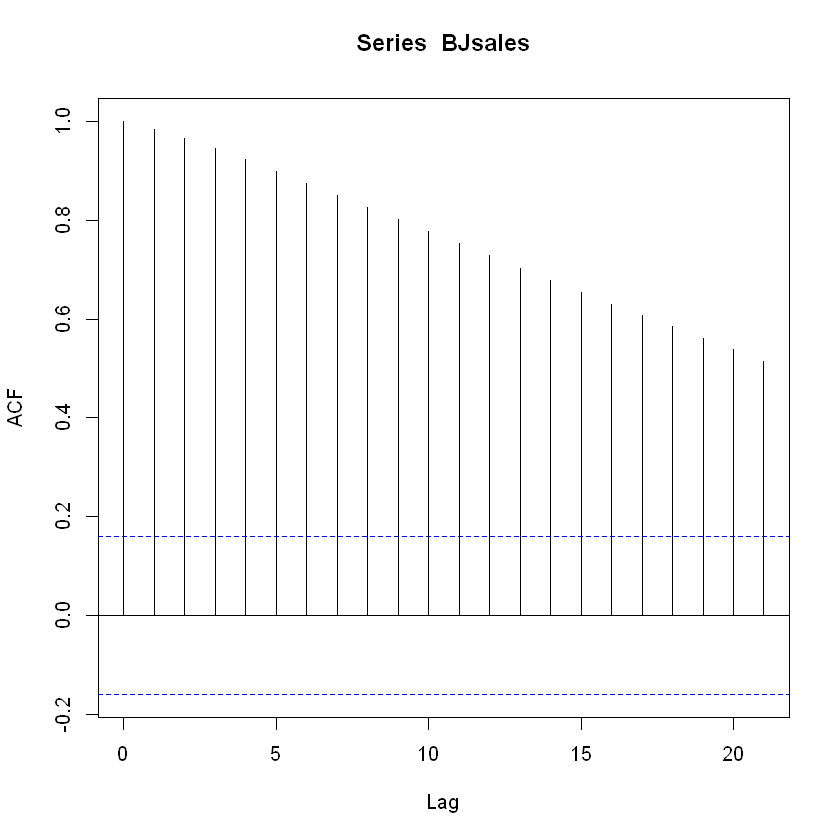

In [5]:
a <- acf(BJsales)
a

### 地道に...。

In [6]:
# 自己相関!!
# resixには全y_tの値を代入
resix <- BJsales[-length(BJsales)]
# resix.0にy_t+1の値を代入
resix.0 <- BJsales[-1]

## 平均
d.m <- mean(BJsales)

### 時点tにおいて偏差の算出
devi.t1 <- (resix - d.m)
devi.t2 <- (resix.0 - d.m)

# 自己共分散 Auto Covariance
sum(devi.t1 * devi.t2)
sum(devi.t1 * devi.t2) / length(resix)
ac <- sum(devi.t1 * devi.t2) / length(resix)

# ラグ0における分散
var(BJsales)
var0 <- var(BJsales)

# 自己相関 Auto regression
ac / var0

[1] 67596

[1] 453.6644

[1] 461.3769

[1] 0.9832837

In [7]:
resi / c0
c0 / resi

ERROR: Error in eval(expr, envir, enclos):  オブジェクト 'resi' がありません 


### 散布図的に...。

In [8]:
library(ggplot2)

[1] 0.9977236

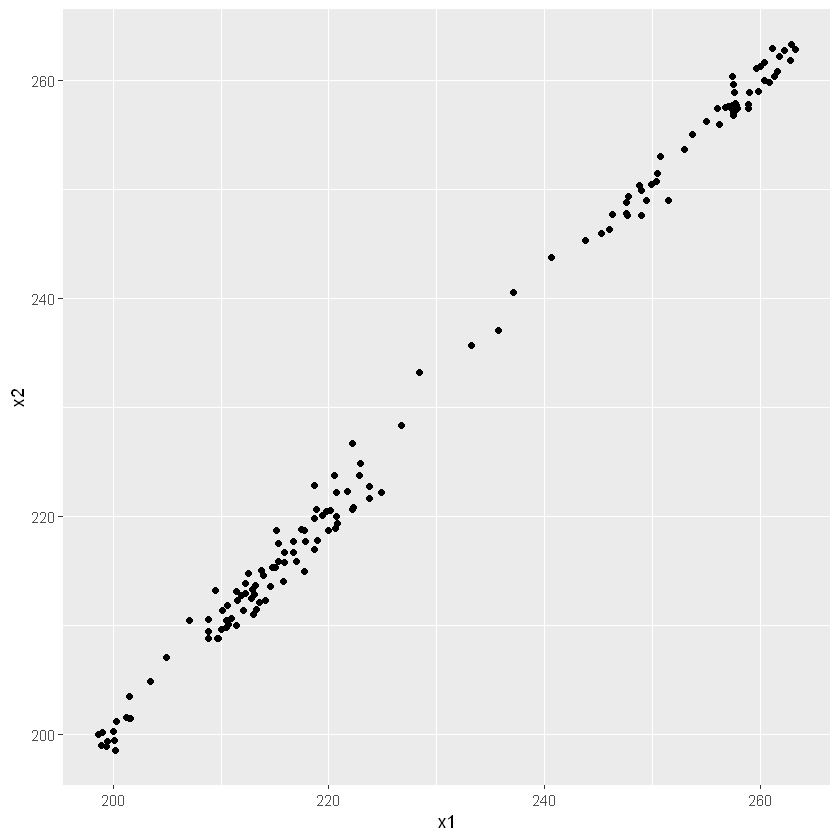

[1] 0.9939458

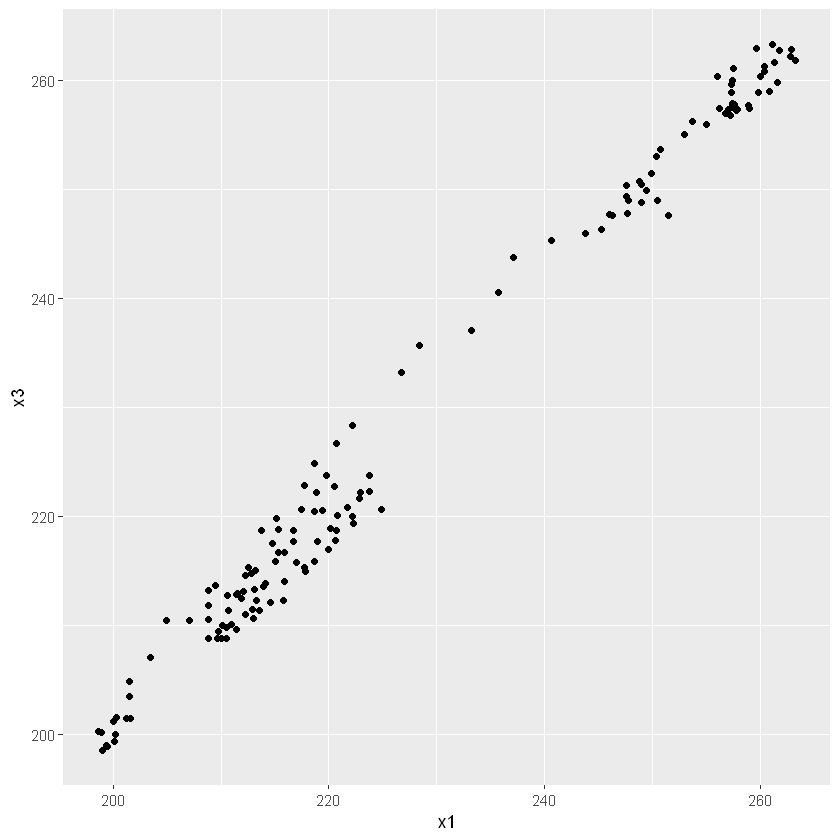

[1] 0.9887567

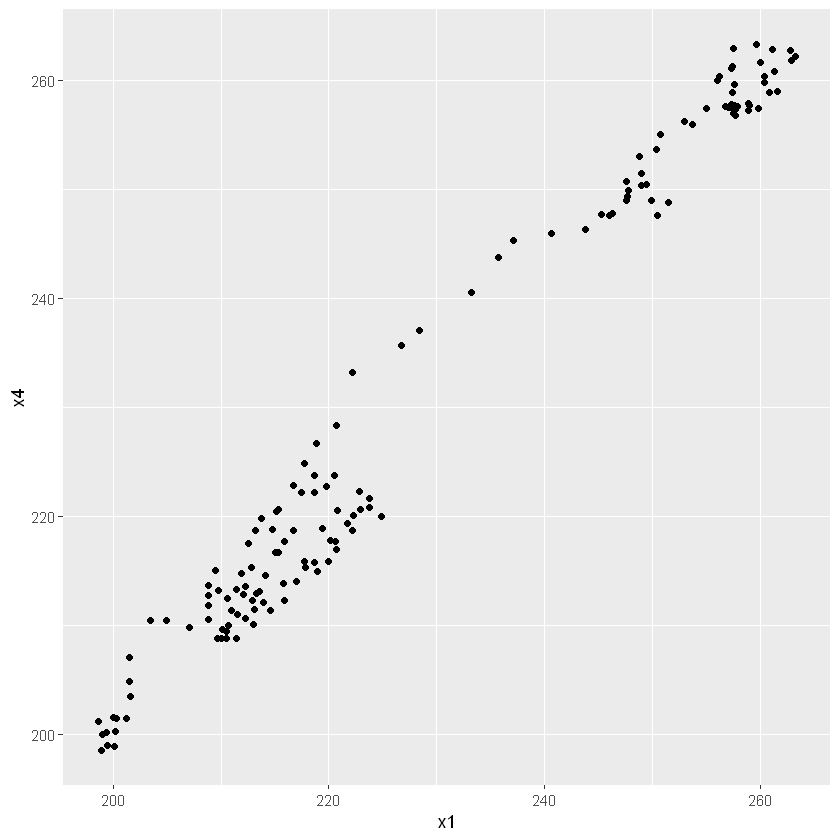

[1] 0.9823555

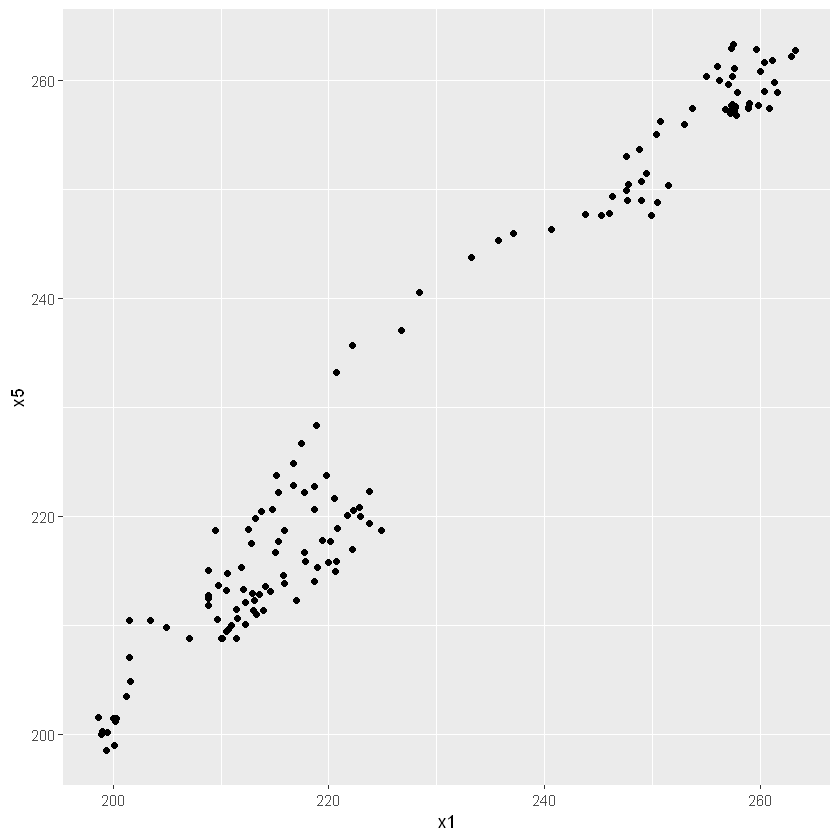

[1] 0.9745493

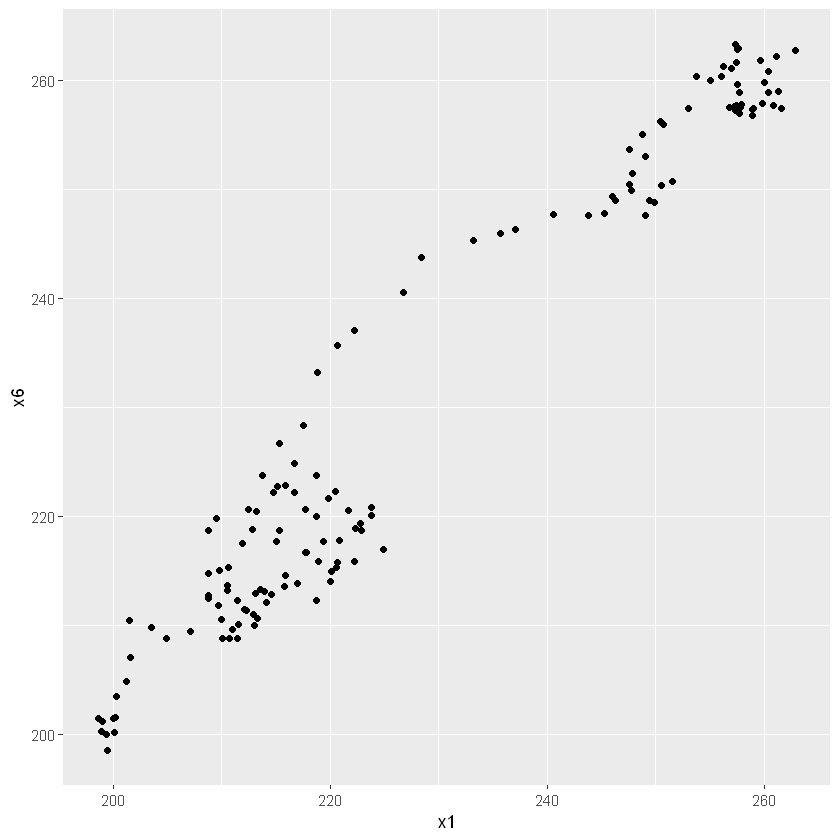

In [9]:
# x1 = 1期目, x2 = 2期目
x  <- as.numeric(BJsales)
#x
# 行末のxを削除
x1 <- x[-length(x)]

x <- as.numeric(BJsales)
#y
# 先頭行を削除
x2 <- x[-1]

ggplot(as.data.frame(cbind(x1, x2)), aes(x = x1, y = x2)) +
  geom_point()
cor(x1, x2)

x1 <- x1[-length(x1)]
x3 <- x2[-1]
ggplot(as.data.frame(cbind(x1, x3)), aes(x = x1, y = x3)) +
  geom_point()
cor(x1, x3)

x1 <- x1[-length(x1)]
x4 <- x3[-1]
ggplot(as.data.frame(cbind(x1, x4)), aes(x = x1, y = x4)) +
  geom_point()
cor(x1, x4)

x1 <- x1[-length(x1)]
x5 <- x4[-1]
ggplot(as.data.frame(cbind(x1, x5)), aes(x = x1, y = x5)) +
  geom_point()
cor(x1, x5)

x1 <- x1[-length(x1)]
x6 <- x5[-1]
ggplot(as.data.frame(cbind(x1, x6)), aes(x = x1, y = x6)) +
  geom_point()
cor(x1, x6)


### 時系列的に...。

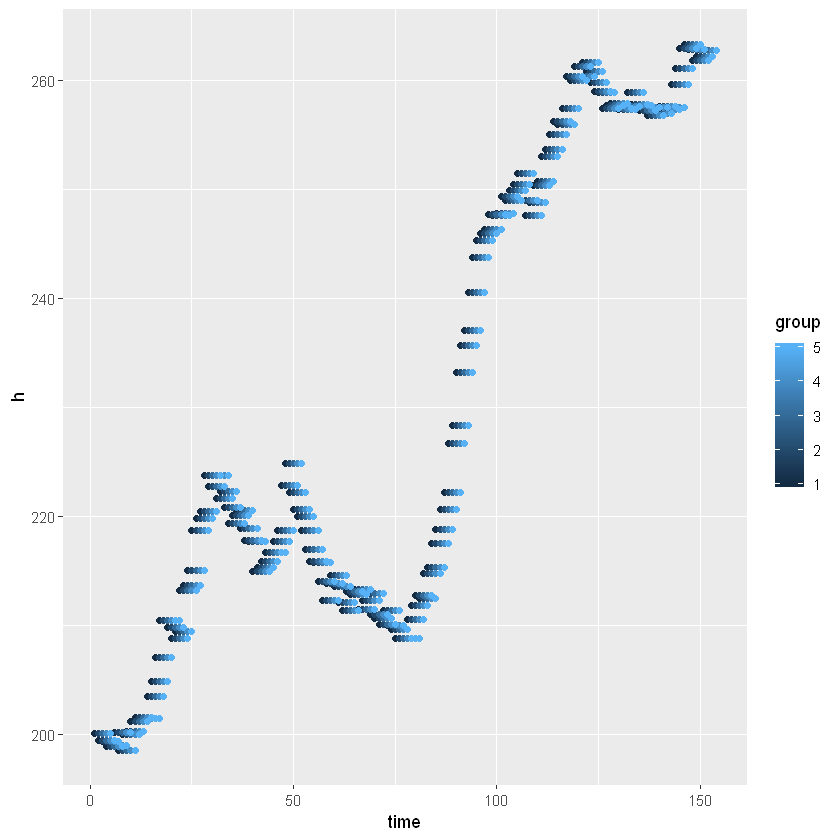

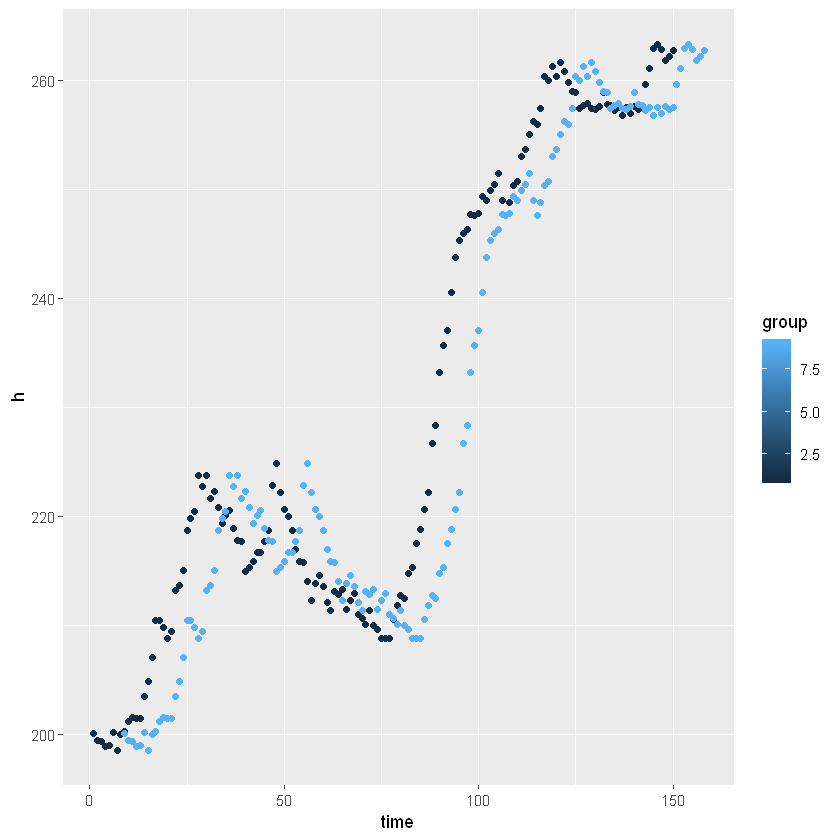

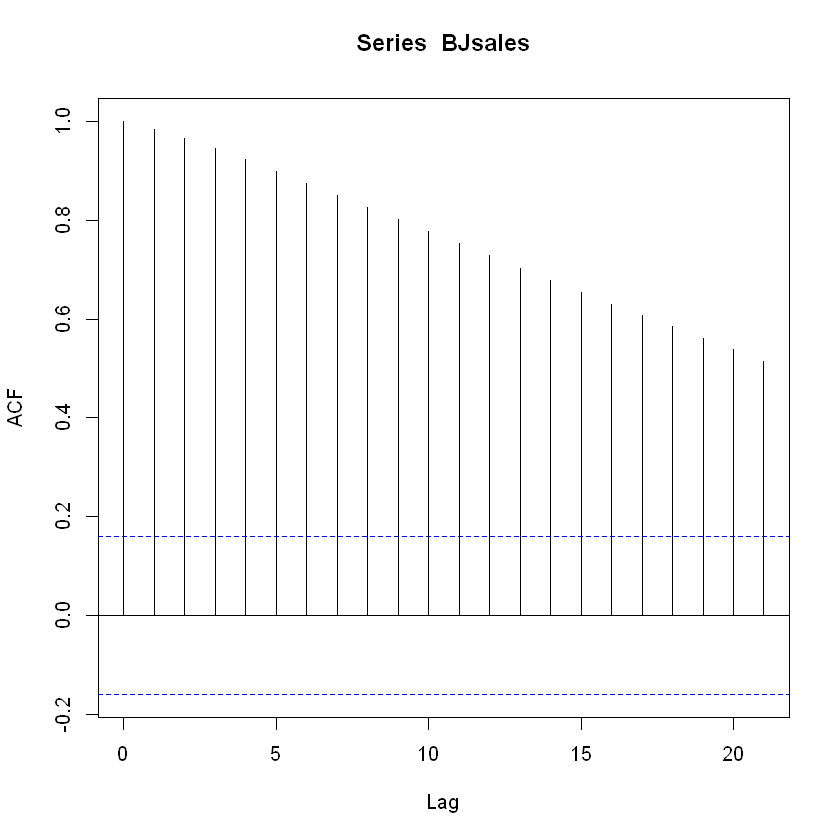

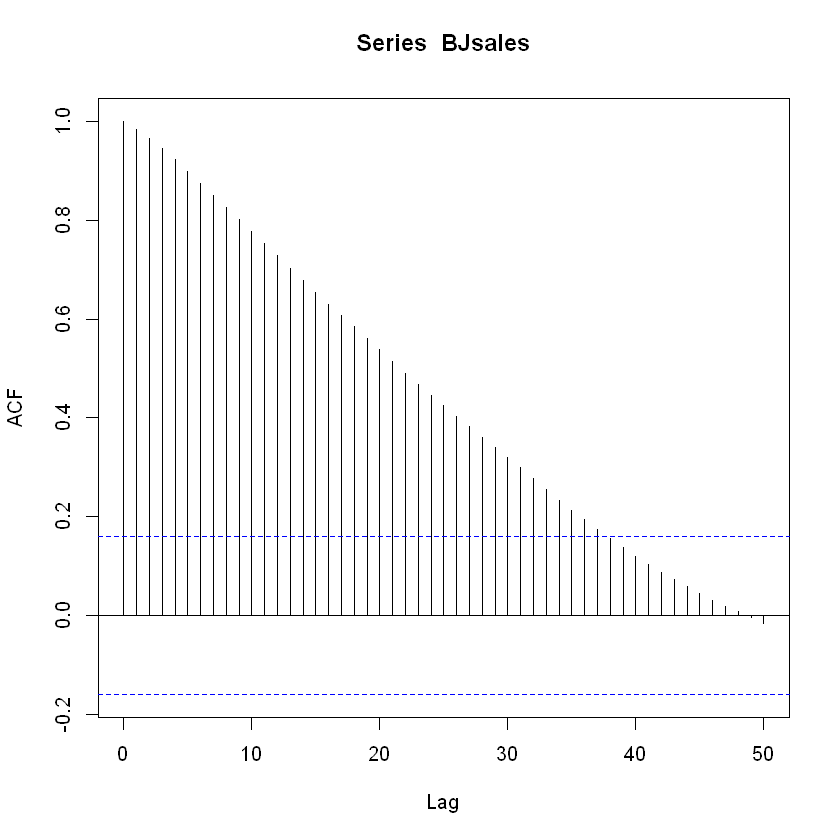

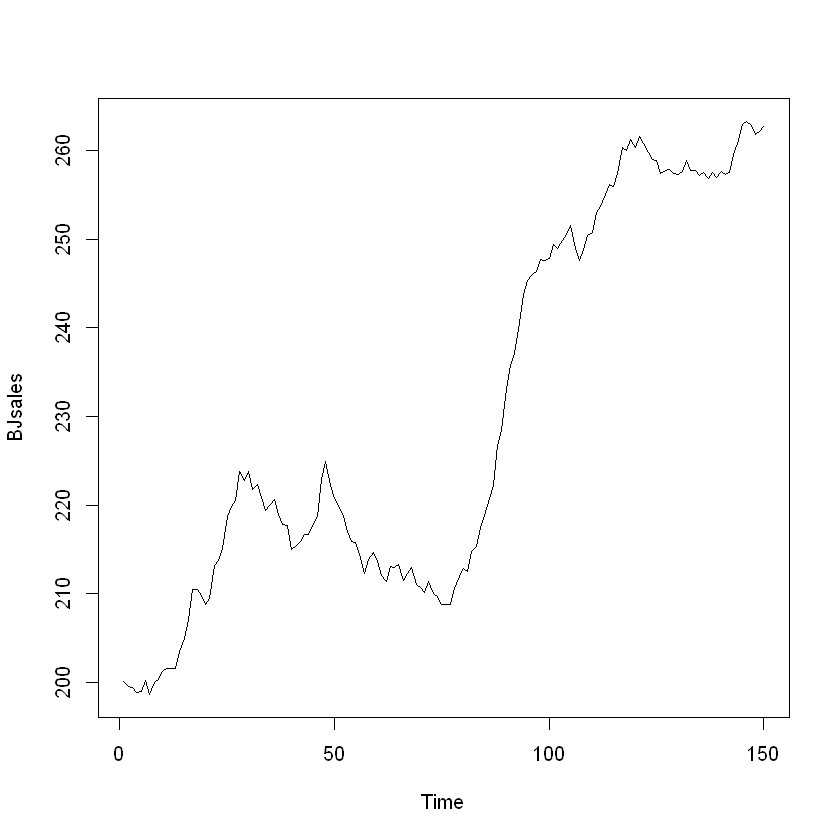

In [10]:
# 1期目
h1 <- as.numeric(BJsales)
time1 <- c(1:150)
group1 <- 1
h11 <- as.data.frame(cbind(time1, h1, group1))
names(h11)  <- c("time", "h", "group")
#h11

# 2期目
h2 <- as.numeric(BJsales)
time2 <- c(2:151)
group2 <- 2
h12 <- as.data.frame(cbind(time2, h2, group2))
names(h12)  <- c("time", "h", "group")
#h12

# 3期目
h3 <- as.numeric(BJsales)
time3 <- c(3:152)
group3 <- 3
h13 <- as.data.frame(cbind(time3, h3, group3))
names(h13)  <- c("time", "h", "group")
#h13

# 4期目
h4 <- as.numeric(BJsales)
time4 <- c(4:153)
group4 <- 4
h14 <- as.data.frame(cbind(time4, h4, group4))
names(h14)  <- c("time", "h", "group")
#h14

# 5期目
h5 <- as.numeric(BJsales)
time5 <- c(5:154)
group5 <- 5
h15 <- as.data.frame(cbind(time5, h5, group5))
names(h15)  <- c("time", "h", "group")
#h15

# 6期目
h6 <- as.numeric(BJsales)
time6 <- c(5:154)
group6 <- 5
h16 <- as.data.frame(cbind(time6, h6, group6))
names(h16)  <- c("time", "h", "group")
#h16


# 10期目
h10 <- as.numeric(BJsales)
time10 <- c(9:158)
group10 <- 9
h110 <- as.data.frame(cbind(time10, h10, group10))
names(h110)  <- c("time", "h", "group")
#h10


# 全体
hx <- rbind(h11, h12, h13, h14, h15, h16)
# 一部
hone <- rbind(h11, h110)


ggplot(hx, aes(x = time, y = h, fill = group, colour = group)) +
  geom_point()

ggplot(hone, aes(x = time, y = h, fill = group, colour = group)) +
  geom_point()


acf(BJsales)
acf(BJsales, lag.max = 50)
plot(BJsales)